# Vermessung der Autolänge

### Importierung und Aufbereiten der Bilder

Text(0.5, 1.0, 'color filter with segmentation')

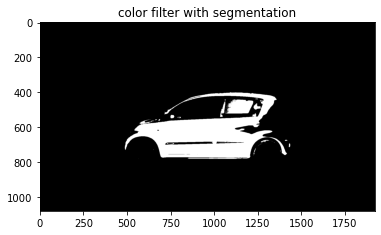

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Import Daihatsu

#color filter with segmentation
 
img = cv2.imread('../datasets/images/test.jpg')
 
blur = cv2.blur(img,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
 
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)
 
low = np.array([60, 40, 50])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv, low, high)
 
res = cv2.bitwise_and(img,img, mask= mask)
 
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
 
_, img_thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
 
plt.imshow(img_thresh, cmap = 'gray')
plt.title('color filter with segmentation')


## Skalierung des Bilds

Text(0.5, 1.0, 'color filter with segmentation')

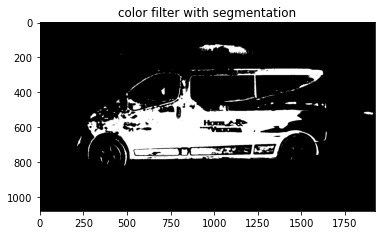

In [10]:
# Import Opel

#color filter with segmentation
 
img = cv2.imread('../datasets/images/bus.jpg')
 
blur = cv2.blur(img,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
 
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)
 
low = np.array([60, 40, 50])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv, low, high)
 
res = cv2.bitwise_and(img,img, mask= mask)
 
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
 
_, img_opel = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
 
plt.imshow(img_opel, cmap = 'gray')
plt.title('color filter with segmentation')


In [11]:
indexes = np.where(img_opel>0)

min_y_opel = min(indexes[0])
max_y_opel = max(indexes[0])

min_x_opel = min(indexes[1])
max_x_opel = max(indexes[1])


print('The minimum x coordinate is', min_x_opel)
print('The maximum x coordinate is', max_x_opel)
print('The minimum y coordinate is', min_y_opel)
print('The maximum y coordinate is', max_y_opel)

The minimum x coordinate is 212
The maximum x coordinate is 1908
The minimum y coordinate is 126
The maximum y coordinate is 820


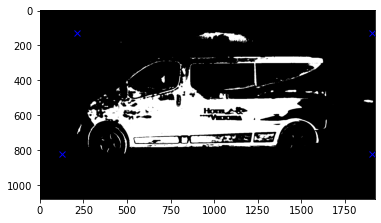

In [13]:
plt.imshow(img_opel, cmap = 'gray')
plt.plot(min_x_opel, min_y_opel, 'bx')
plt.plot(min_y_opel, max_y_opel, 'bx')
plt.plot(max_x_opel, min_y_opel, 'bx')
plt.plot(max_x_opel, max_y_opel, 'bx')

## Skalierung auf kleinere Werte

In [15]:

img_cutted = img_thresh[200:1000, 150:1750] 

## Äußerste weißen Punkte im Array finden

In [16]:
indexes = np.where(img_cutted>0)

min_y = min(indexes[0])
max_y = max(indexes[0])

min_x = min(indexes[1])
max_x = max(indexes[1])


print('The minimum x coordinate is', min_x)
print('The maximum x coordinate is', max_x)
print('The minimum y coordinate is', min_y)
print('The maximum y coordinate is', max_y)

The minimum x coordinate is 336
The maximum x coordinate is 1283
The minimum y coordinate is 202
The maximum y coordinate is 581


## Überprüfung der Werte 

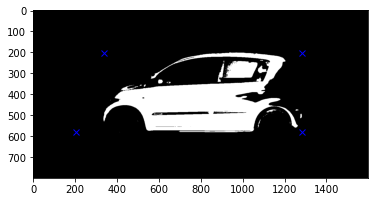

In [18]:
plt.imshow(img_cutted, cmap = 'gray')
plt.plot(min_x, min_y, 'bx')
plt.plot(min_y, max_y, 'bx')
plt.plot(max_x, min_y, 'bx')
plt.plot(max_x, max_y, 'bx')

## Länge und Höhe Berechnen

In [21]:
height_px2 = max_y - min_y
width_px2 = max_x - min_x

In [22]:
height_px2, width_px2

(379, 947)

## Pixel-in-Milimeter-Faktor ermitteln
### Reale Länge des Blauen Auto sind 3630 mm
### Reale Höhe des Blauen Auto sind 1550 mm

In [34]:
Faktor_Länge= 3630/947

In [27]:
Faktor

3.833157338965153

In [35]:
Faktor_Höhe= 1550/379

In [36]:
Faktor_Höhe

4.089709762532982

## Funktion erstellen

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Import Opel

#color filter with segmentation
 
img = cv2.imread('../datasets/images/test.jpg')
 
blur = cv2.blur(img,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
 
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)
 
low = np.array([60, 40, 50])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv, low, high)
 
res = cv2.bitwise_and(img,img, mask= mask)
 
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
 
_, img_thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
 


def measure(x):

    #Array given to function
    img=x
    img_copy = img[200:1000, 250:1600]       #scaling pic


    indexes = np.where(img_copy>0)         #find min and max Array (x and y)

    min_y = min(indexes[0])
    max_y = max(indexes[0])

    min_x = min(indexes[1])
    max_x = max(indexes[1])

    height_pi = max_y - min_y           #length and heigth of the car in pixel
    width_pi = max_x - min_x 

    Länge = width_pi*(3.83)                #length and heigth in mm
    Höhe = height_pi*(4.09)


    return(Länge, Höhe)

Werte_Auto = measure(img_thresh)

In [32]:
Werte_Auto

(3627.01, 1550.11)

## Finaler Testlauf

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

 
img = cv2.imread('../datasets/images/bus.jpg')
 
blur = cv2.blur(img,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
 
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)
 
low = np.array([60, 40, 50])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv, low, high)
 
res = cv2.bitwise_and(img,img, mask= mask)
 
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
 
_, img_thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
 
Werte_Auto= measure(img_thresh)

Werte_Auto

(5086.24, 2269.95)